In [1]:
import pandas as pd
import numpy as np
import time
import re
from collections import Counter
import statsmodels.formula.api as sm
import matplotlib.pyplot as plt
import gensim
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

/Users/paul.zhang/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/paul.zhang/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
aliens = pd.read_csv('archive/sf_aliens.csv',encoding = 'utf-8')
aliens["type"] = "aliens"
history =pd.read_csv('archive/sf_alternate_history.csv',encoding = 'utf-8')
history["type"] = "history"
universe=pd.read_csv('archive/sf_alternate_universe.csv',encoding = 'utf-8')
universe["type"] = "universe"
apocalyptic = pd.read_csv('archive/sf_apocalyptic.csv',encoding = 'utf-8')
apocalyptic["type"] = "apocalyptic"
cyberpunk =pd.read_csv('archive/sf_cyberpunk.csv',encoding = 'utf-8')
cyberpunk["type"] = "cyberpunk"
dystopia = pd.read_csv('archive/sf_dystopia.csv',encoding = 'utf-8')
dystopia["type"] = "dystopia"
hard=pd.read_csv('archive/sf_hard.csv',encoding = 'utf-8')
hard["type"] = "hard"
military=pd.read_csv('archive/sf_military.csv',encoding = 'utf-8')
military["type"] = "military"
robots=pd.read_csv('archive/sf_robots.csv',encoding = 'utf-8')
robots["type"] = "robots"
space=pd.read_csv('archive/sf_space_opera.csv',encoding = 'utf-8')
space["type"] = "space opera"
steampunk=pd.read_csv('archive/sf_steampunk.csv',encoding = 'utf-8')
steampunk["type"] = "steampunk"
time_travel=pd.read_csv('archive/sf_time_travel.csv',encoding = 'utf-8')
time_travel["type"] = "time travel"

In [3]:
df=pd.DataFrame()
df=pd.concat([df,aliens])
df = pd.concat([df,history])
df=pd.concat([df,universe])
df=pd.concat([df,apocalyptic])
df=pd.concat([df,cyberpunk])
df=pd.concat([df,robots])
df=pd.concat([df,space])
df=pd.concat([df,steampunk])
df=pd.concat([df,dystopia])
df=pd.concat([df,hard])
df=pd.concat([df,military])
df=pd.concat([df,time_travel])
df = df.reset_index()
print(df.Book_Description[0])

Starting over sucks.When we moved to West Virginia right before my senior year, I’d pretty much resigned myself to thick accents, dodgy internet access, and a whole lot of boring… until I spotted my hot neighbor, with his looming height and eerie green eyes. Things were looking up.And then he opened his mouth.Daemon is infuriating. Arrogant. Stab-worthy. We do not get along. At all. But when a stranger attacks me and Daemon literally freezes time with a wave of his hand, well, something… unexpected happens. The hot alien living next door marks me.You heard me. Alien. Turns out Daemon and his sister have a galaxy of enemies wanting to steal their abilities, and Daemon’s touch has me lit up like the Vegas Strip. The only way I’m getting out of this alive is by sticking close to Daemon until my alien mojo fades. If I don’t kill him first, that is.


In [4]:
#df = pd.read_csv('DisneylandReviews.csv',encoding='latin-1')
#df.tail()

In [5]:
df = df[['Book_Title','Rating_score','Rating_votes','Review_number','Book_Description','type','url']]
df = df.dropna(subset=["Book_Description"])
df = df.reset_index()
stop_words = set(stopwords.words('english'))


#for des in df.Book_Description[0]:
    #print(des)

In [6]:
def cleanup_review(desc):
    if type(desc) == float:
        desc = ""
    words = [re.sub(r'[^a-z]', '', w) for w in desc.lower().split(' ')]
    return ' '.join(words)

def reduce_to_vocabulary(desc, vocab):
    return ' '.join([w for w in cleanup_review(desc).split(' ') if w in vocab])



In [7]:
cleanup_review(df.Book_Description[0])

'starting over suckswhen we moved to west virginia right before my senior year id pretty much resigned myself to thick accents dodgy internet access and a whole lot of boring until i spotted my hot neighbor with his looming height and eerie green eyes things were looking upand then he opened his mouthdaemon is infuriating arrogant stabworthy we do not get along at all but when a stranger attacks me and daemon literally freezes time with a wave of his hand well something unexpected happens the hot alien living next door marks meyou heard me alien turns out daemon and his sister have a galaxy of enemies wanting to steal their abilities and daemons touch has me lit up like the vegas strip the only way im getting out of this alive is by sticking close to daemon until my alien mojo fades if i dont kill him first that is'

In [8]:
vocab = Counter()
for review in df.Book_Description:
    vocab.update(cleanup_review(review).split(' '))

print(vocab['and'])
print(len(vocab)) 


68298
84696


In [9]:
vocab = Counter(token for token in vocab.elements() if vocab[token] > 5)
stop_words = [item[0] for item in vocab.most_common(100)]
vocab = Counter(token for token in vocab.elements() if token not in stop_words and token not in stopwords.words('english'))

del vocab['']
print(len(vocab))


18563


In [10]:
desc = df['Book_Description'][9]
print('Original description:\n---------------------')
print(desc)

print('\nCleaned up text:\n----------------')
print(cleanup_review(desc))

print('\nReduced to vocabulary:\n----------------------')
print(reduce_to_vocabulary(desc, vocab))

Original description:
---------------------
The last thing Dawson Black expected was Bethany Williams. As a Luxen, an alien life form on Earth, human girls are…well, fun. But since the Luxen have to keep their true identities a secret, falling for one would be insane.Dangerous. Tempting. Undeniable.Bethany can’t deny the immediate connection between her and Dawson. And even though boys aren’t a complication she wants, she can’t stay away from him. Still, whenever they lock eyes, she’s drawn in.Captivated. Lured. Loved.Dawson is keeping a secret that will change her existence...and put her life in jeopardy. But even he can’t stop risking everything for one human girl. Or from a fate that is as unavoidable as love itself.

Cleaned up text:
----------------
the last thing dawson black expected was bethany williams as a luxen an alien life form on earth human girls arewell fun but since the luxen have to keep their true identities a secret falling for one would be insanedangerous tempting 

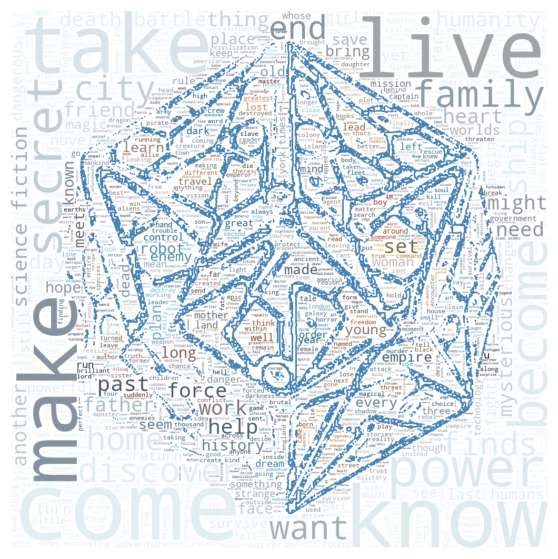

In [11]:
from wordcloud import WordCloud,ImageColorGenerator
from PIL import Image
long_string = ','.join([reduce_to_vocabulary(desc,vocab) for desc in list(df.Book_Description)])
mask = np.array(Image.open("cube3.png"))
image_colors = ImageColorGenerator(mask)
wordcloud = WordCloud(background_color = 'white',mask = mask, max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud


# lower max_font_size
fig = plt.figure()
fig.set_size_inches(7,7)
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
plt.show()
#wordcloud.to_file('dice1.png')

In [12]:
id2word = {idx:pair[0] for idx,pair in enumerate(vocab.items())}
word2id = {pair[0]:idx for idx,pair in enumerate(vocab.items())}

s = 'rush'
print("Number of tokens mapped: %d" % len(id2word))
print("Identifier for '%s': %d" % (s,word2id[s]))
print("Word for identifier %d: %s" % (word2id[s], id2word[word2id[s]]))

Number of tokens mapped: 18563
Identifier for 'rush': 5973
Word for identifier 5973: rush


In [13]:
def get_token(df = df):
    tokens = []
    for desc in df.Book_Description:
        clean = reduce_to_vocabulary(cleanup_review(desc),vocab)
        toks = clean.split(' ')
        tokens.append(toks)
    return tokens

tokens = get_token()
    

In [14]:
def get_corpus(tokens,corpus = None):
    if corpus == None:
        corpus = []
    for toks in tokens:
        tkn_count = Counter(toks)
        corpus.append([(word2id[item[0]],item[1]) for item in tkn_count.items() if item[0] != ''])
    return corpus

corpus = get_corpus(tokens)



In [15]:
%%time
tm = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                     id2word=id2word,
                                     num_topics=100, 
                                     random_state=100,
                                     chunksize=100,
                                     passes=10,
                                     alpha='auto',
                                     per_word_topics=True)

CPU times: user 3min 39s, sys: 3min 11s, total: 6min 51s
Wall time: 2min 44s


In [16]:
num_topics = 100
num_words = 15
top_words = pd.DataFrame({'word rank': np.arange(1,num_words+1)})
for k in np.arange(num_topics): 
    topic = tm.get_topic_terms(k, num_words)
    words = [id2word[topic[i][0]] for i in np.arange(num_words)]
    probs = [topic[i][1] for i in np.arange(num_words)]
    top_words['topic %d' % k] = words

top_words

/var/folders/rr/qd1wksyx4dn235nx3_px22th0000gn/T/ipykernel_12096/1435004049.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  top_words['topic %d' % k] = words


,word rank,topic 0,topic 1,topic 2,topic 3,topic 4,topic 5,topic 6,topic 7,topic 8,...,topic 90,topic 91,topic 92,topic 93,topic 94,topic 95,topic 96,topic 97,topic 98,topic 99
0,1,theres,great,quiet,different,return,search,run,making,living,...,came,battle,city,second,fantasy,something,death,magic,galactic,far
1,2,thats,modern,simple,seems,arms,allies,desperate,starts,turns,...,four,th,others,system,annie,real,fight,hunt,favorite,ship
2,3,books,st,soldier,called,matter,soul,give,heroes,stranger,...,town,however,conflict,coming,romantic,reality,enemies,words,secretly,crew
3,4,dont,american,vampire,black,name,courage,bride,thrown,west,...,including,late,calls,carrying,done,wakes,deadly,couldnt,jumps,galaxy
4,5,read,choose,meant,terrifying,ready,follow,fears,scientist,door,...,original,ultimate,survived,trilogy,form,memory,forced,runs,warring,ships
5,6,got,victorian,creature,unlikely,tries,terror,wedding,missions,keeps,...,rest,revenge,futuristic,volume,fun,conspiracy,evil,twin,easier,drawn
6,7,happen,cost,sight,explores,pirate,voice,hunting,academy,rising,...,michael,ben,loyalties,half,shows,violence,filled,bit,monster,better
7,8,say,millions,encountered,organization,prison,invaders,hunted,authors,green,...,brave,loss,lab,solar,boys,giant,command,cosmic,permanent,distant
8,9,expect,begun,equally,desert,shell,refuses,nowhere,catastrophe,literally,...,presence,adam,carry,encounter,ordinary,passed,plot,lethal,thrive,adventures
9,10,guy,facing,selling,empty,wishes,giving,intense,strikes,heard,...,started,important,rage,total,vampires,language,almost,sean,thesis,exciting


In [17]:
def preprocess_new_text(text):
    clean = reduce_to_vocabulary(cleanup_review(text),vocab)
    tokens = clean.split(' ')
    token = [tok for tok in tokens if tok in word2id.keys()]
    preprocessed_text = []
    tkn_count = Counter(token)
    preprocessed_text = [(word2id[item[0]],item[1]) for item in tkn_count.items() if item[0] != '']
    return preprocessed_text



In [18]:
def get_topic_table(example = None, df = corpus, text = None):
    if example == None:
        topic_dist = tm.get_document_topics(preprocess_new_text(text))
    else:
        topic_dist = tm.get_document_topics(corpus[example])
    topics = [pair[0] for pair in topic_dist]
    probabilities = [pair[1] for pair in topic_dist]
    topic_dist_table = pd.DataFrame()
    topic_dist_table['Topic'] = topics
    topic_dist_table['Probabilities'] = probabilities
    return topic_dist_table



In [19]:
text = 'Back to the Future" is a beloved science fiction film series directed by Robert Zemeckis. It follows the adventures of Marty McFly, a teenager, and his eccentric scientist friend, Dr. Emmett "Doc" Brown. The story begins when Doc Brown invents a time machine in the form of a DeLorean car, accidentally sending Marty back in time to the 1950s. There, Marty encounters his young parents and inadvertently disrupts the course of history. The heart of the series lies in Marty\'s efforts to set things right and ensure his parents fall in love, all while dealing with the complexities of time travel. Throughout the trilogy, Marty and Doc travel between the past, present, and future, encountering various challenges, paradoxes, and unexpected consequences.'
topic_dist_table = get_topic_table(example = 9, text = text)



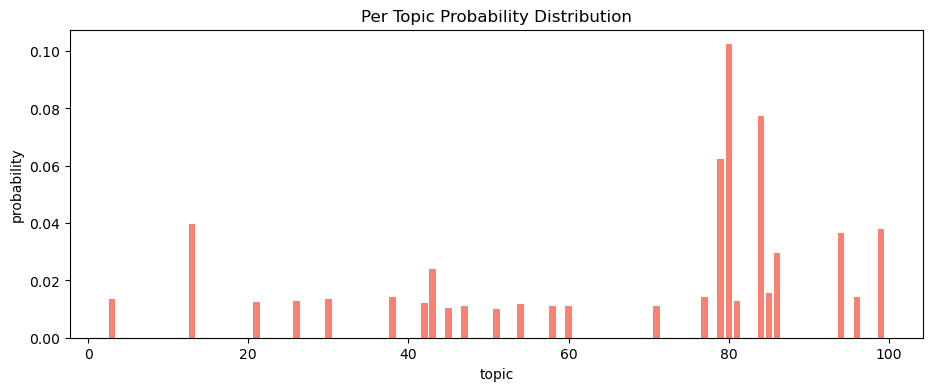

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure()
fig.set_size_inches(11,4)
plt.bar(topic_dist_table['Topic'], topic_dist_table['Probabilities'], align='center', alpha=1, color='salmon')
plt.xlabel('topic')
plt.ylabel('probability')
plt.title('Per Topic Probability Distribution')
plt.show()

In [21]:
num_topics = 100
theta = pd.DataFrame({"Theta0": np.zeros(df.shape[0])})
for t in np.arange(1,num_topics):
    theta["Theta"+str(t)] = np.zeros(df.shape[0])
    
for i in np.arange(df.shape[0]):
    for t in tm.get_document_topics(corpus[i]):
        theta.loc[i,"Theta"+str(t[0])] = t[1]
print(theta)
        

         Theta0    Theta1  Theta2    Theta3    Theta4    Theta5    Theta6  \
0      0.011079  0.000000     0.0  0.000000  0.000000  0.000000  0.000000   
1      0.026416  0.000000     0.0  0.011177  0.011204  0.000000  0.000000   
2      0.000000  0.090331     0.0  0.000000  0.000000  0.000000  0.010122   
3      0.012799  0.000000     0.0  0.000000  0.000000  0.076262  0.000000   
4      0.010777  0.000000     0.0  0.027838  0.000000  0.000000  0.000000   
...         ...       ...     ...       ...       ...       ...       ...   
14898  0.000000  0.000000     0.0  0.011666  0.028335  0.000000  0.000000   
14899  0.000000  0.017945     0.0  0.000000  0.000000  0.000000  0.000000   
14900  0.000000  0.000000     0.0  0.000000  0.000000  0.000000  0.000000   
14901  0.000000  0.000000     0.0  0.000000  0.000000  0.000000  0.000000   
14902  0.000000  0.000000     0.0  0.000000  0.000000  0.000000  0.011712   

         Theta7    Theta8    Theta9  ...   Theta90   Theta91  Theta92  \
0 

In [22]:
df_topics = df.join(theta)
df_topics

,index,Book_Title,Rating_score,Rating_votes,Review_number,Book_Description,type,url,Theta0,Theta1,...,Theta90,Theta91,Theta92,Theta93,Theta94,Theta95,Theta96,Theta97,Theta98,Theta99
0,0,Obsidian,4.17,236780,18161,Starting over sucks.When we moved to West Virg...,aliens,https://www.goodreads.com/book/show/12578077-o...,0.011079,0.000000,...,0.012032,0.000000,0.0,0.000000,0.0,0.011206,0.023645,0.000000,0.0,0.016622
1,1,Onyx,4.27,153429,10497,BEING CONNECTED TO DAEMON BLACK SUCKS… Thanks ...,aliens,https://www.goodreads.com/book/show/13047090-onyx,0.026416,0.000000,...,0.011400,0.000000,0.0,0.000000,0.0,0.000000,0.011774,0.000000,0.0,0.010431
2,2,The 5th Wave,4.03,400600,29990,"After the 1st wave, only darkness remains. Aft...",aliens,https://www.goodreads.com/book/show/16101128-t...,0.000000,0.090331,...,0.000000,0.037180,0.0,0.000000,0.0,0.000000,0.018998,0.000000,0.0,0.011601
3,3,The Host,3.84,915026,41673,Melanie Stryder refuses to fade away. The eart...,aliens,https://www.goodreads.com/book/show/1656001.Th...,0.012799,0.000000,...,0.013907,0.000000,0.0,0.000000,0.0,0.000000,0.014366,0.000000,0.0,0.012728
4,4,Opal,4.27,129006,9463,No one is like Daemon Black.When he set out to...,aliens,https://www.goodreads.com/book/show/13362536-opal,0.010777,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.010901,0.023001,0.000000,0.0,0.010716
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14898,14969,Tumbling Through Time,3.34,312,51,"In her sparkling and hilarious debut, author G...",time travel,https://www.goodreads.com/book/show/1888734.Tu...,0.000000,0.000000,...,0.000000,0.000000,0.0,0.011138,0.0,0.016625,0.012296,0.000000,0.0,0.021979
14899,14970,Time's Arrow,3.71,14934,1106,In Time's Arrow the doctor Tod T. Friendly die...,time travel,https://www.goodreads.com/book/show/23031.Time...,0.000000,0.017945,...,0.000000,0.010111,0.0,0.000000,0.0,0.000000,0.017274,0.000000,0.0,0.023092
14900,14971,Time Out of Joint,3.85,11126,688,Time Out of Joint is Philip K. Dick’s classic ...,time travel,https://www.goodreads.com/book/show/698034.Tim...,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.015576,0.000000,0.0,0.013800
14901,14972,Fog Magic,3.88,1204,170,"Originally published in 1943, this edition fea...",time travel,https://www.goodreads.com/book/show/297891.Fog...,0.000000,0.000000,...,0.000000,0.000000,0.0,0.013450,0.0,0.000000,0.014846,0.011101,0.0,0.013153


In [23]:
text = '"Back to the Future" is a beloved science fiction film series directed by Robert Zemeckis. It follows the adventures of Marty McFly, a teenager, and his eccentric scientist friend, Dr. Emmett "Doc" Brown. The story begins when Doc Brown invents a time machine in the form of a DeLorean car, accidentally sending Marty back in time to the 1950s. There, Marty encounters his young parents and inadvertently disrupts the course of history. The heart of the series lies in Marty\'s efforts to set things right and ensure his parents fall in love, all while dealing with the complexities of time travel. Throughout the trilogy, Marty and Doc travel between the past, present, and future, encountering various challenges, paradoxes, and unexpected consequences. "Back to the Future" is renowned for its clever blend of science fiction, comedy, and adventure, exploring themes of destiny, family, and the ripple effects of one\'s actions in a time-altering journey. The series consists of three films: "Back to the Future" (1985), "Back to the Future Part II" (1989), and "Back to the Future Part III" (1990). Together, they form a timeless and entertaining tale of time travel and the enduring bond between friends, making "Back to the Future" one of the most iconic and beloved franchises in cinema history.'
topic_table = get_topic_table(example = None, df = corpus, text = text)
print(topic_table)

    Topic  Probabilities
0       7       0.016256
1      13       0.043163
2      14       0.012423
3      18       0.011660
4      21       0.017650
5      24       0.011696
6      26       0.012055
7      28       0.015531
8      29       0.013262
9      33       0.018338
10     37       0.010511
11     39       0.019864
12     42       0.011397
13     43       0.022464
14     45       0.015660
15     50       0.013949
16     53       0.034159
17     54       0.016787
18     60       0.016218
19     64       0.010331
20     68       0.012095
21     69       0.020477
22     72       0.011683
23     75       0.012006
24     79       0.052436
25     80       0.048150
26     81       0.018062
27     84       0.042608
28     86       0.027490
29     89       0.029495
30     90       0.012748
31     93       0.011933
32     94       0.016432
33     96       0.013172
34     99       0.017607


In [24]:
def cosine_similarity(A, B):
    return np.dot(A, B) / (np.linalg.norm(A) * np.linalg.norm(B))

def get_top_k_similarity(k,text,df_topics = df_topics):
    d = {}
    topic_table = get_topic_table(example = None, df = corpus, text = text)
    for i in range(df_topics.shape[0]):
        theta = ['Theta' + str(idx) for idx in topic_table.Topic]
        d[i] = cosine_similarity(topic_table.Probabilities,df_topics.iloc[i][theta])
    d = dict(sorted(d.items(), key=lambda item: -item[1]))
    index = list(d.keys())[0:k]
    recommend = df_topics.iloc[index][['Book_Title','type']]
    recommend['similarity'] = list(d.values())[0:k]
    return recommend

In [25]:
text = 'Back to the Future" is a beloved science fiction film series directed by Robert Zemeckis. It follows the adventures of Marty McFly, a teenager, and his eccentric scientist friend, Dr. Emmett "Doc" Brown. The story begins when Doc Brown invents a time machine in the form of a DeLorean car, accidentally sending Marty back in time to the 1950s. There, Marty encounters his young parents and inadvertently disrupts the course of history. The heart of the series lies in Marty\'s efforts to set things right and ensure his parents fall in love, all while dealing with the complexities of time travel. Throughout the trilogy, Marty and Doc travel between the past, present, and future, encountering various challenges, paradoxes, and unexpected consequences. '
recommend = get_top_k_similarity(k = 100,text = text ,df_topics = df_topics)
print(recommend)

                     Book_Title         type  similarity
9556                    Untimed    steampunk    0.931490
14211                   Untimed  time travel    0.931490
4514                 The Border  apocalyptic    0.929939
14276  The Highlander's Bargain  time travel    0.924832
6814                       BZRK       robots    0.924173
...                         ...          ...         ...
13684                    Replay  time travel    0.909479
1692                     Replay      history    0.909479
1646                Unholy Land      history    0.908969
14483            City of Swords  time travel    0.908805
14203   The Lost Time Accidents  time travel    0.908780

[100 rows x 3 columns]


             Book_Title  similarity
type                               
aliens                4           4
apocalyptic           6           6
cyberpunk            10          10
dystopia             10          10
hard                  6           6
history              12          12
military              3           3
robots                8           8
space opera           4           4
steampunk             9           9
time travel          23          23
universe              5           5


<BarContainer object of 12 artists>

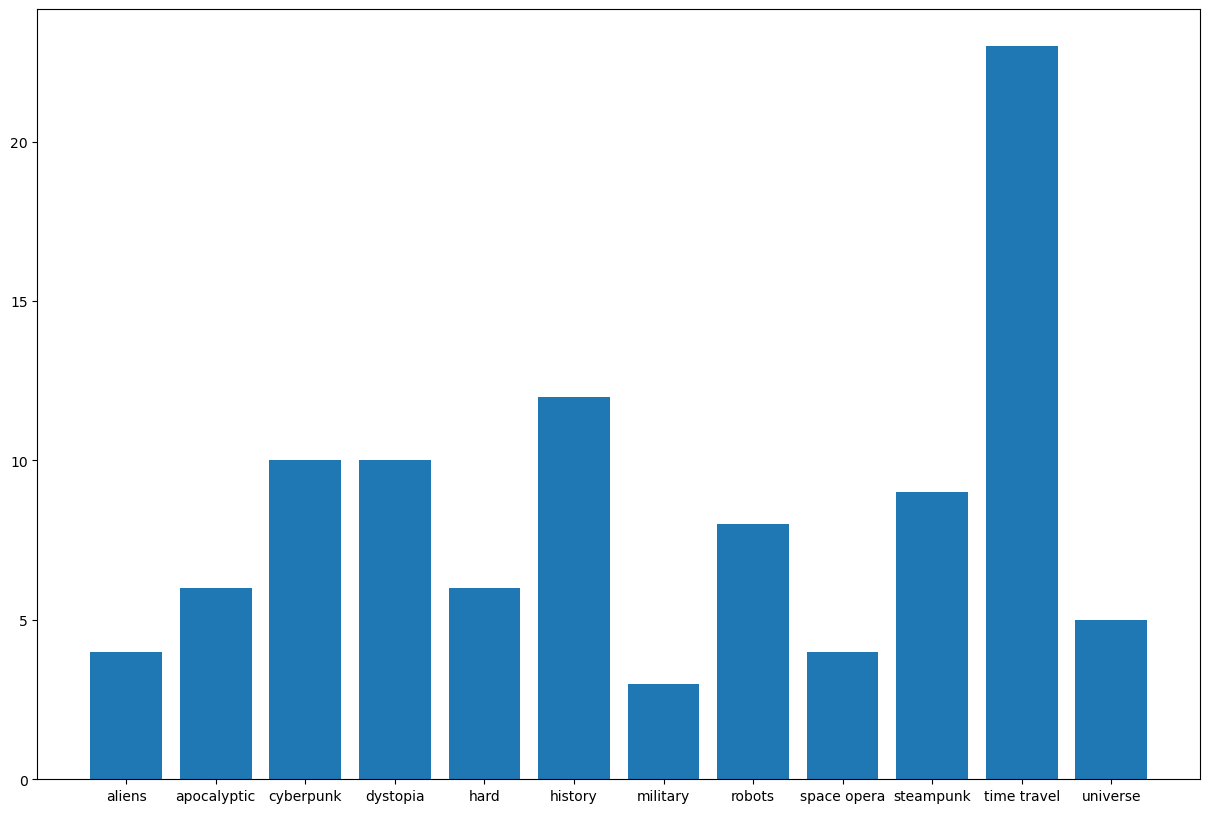

In [26]:
stat = recommend.groupby(['type']).count()
print(stat)

x = stat.index
y = stat.Book_Title

fig = plt.figure()
fig.set_size_inches(15,10)
plt.bar(x,y)

In [39]:
from scipy.stats import entropy
def get_top_kL(k,text,df_topics = df_topics):
    d = {}
    epsilon = 1e-10
    topic_table = get_topic_table(example = None, df = corpus, text = text)
    for i in range(df_topics.shape[0]):
        theta = ['Theta' + str(idx) for idx in topic_table.Topic]
        Probabilities =  list(topic_table.Probabilities)/ np.sum(list(topic_table.Probabilities)) + epsilon
        theta = list(df_topics.iloc[i][theta]) / np.sum(list(df_topics.iloc[i][theta])) + epsilon
        d[i] = entropy(np.array(Probabilities),np.array(theta))
    d = dict(sorted(d.items(), key=lambda item: item[1]))
    index = list(d.keys())[0:k]
    recommend = df_topics.iloc[index][['Book_Title','type']]
    recommend['KL_entropy'] = list(d.values())[0:k]
    return recommend

In [40]:
text = 'Back to the Future" is a beloved science fiction film series directed by Robert Zemeckis. It follows the adventures of Marty McFly, a teenager, and his eccentric scientist friend, Dr. Emmett "Doc" Brown. The story begins when Doc Brown invents a time machine in the form of a DeLorean car, accidentally sending Marty back in time to the 1950s. There, Marty encounters his young parents and inadvertently disrupts the course of history. The heart of the series lies in Marty\'s efforts to set things right and ensure his parents fall in love, all while dealing with the complexities of time travel. Throughout the trilogy, Marty and Doc travel between the past, present, and future, encountering various challenges, paradoxes, and unexpected consequences. '
recommend = get_top_kL(k = 200,text = text ,df_topics = df_topics)
print(recommend)

                              Book_Title         type  KL_entropy
1982          Counting Up, Counting Down      history    2.619649
9553                  The Shotgun Arcana    steampunk    2.726500
12856                     Forget Nothing     military    3.016533
14613              Flirting with Forever  time travel    3.139378
10642  Divergent Series Complete Box Set     dystopia    3.185950
...                                  ...          ...         ...
12088                    Martians Abroad         hard    4.282442
14783                  Aching for Always  time travel    4.290005
7525                    Children of Dune  space opera    4.292664
4258                      Lilith's Brood  apocalyptic    4.293367
304                       Lilith's Brood       aliens    4.293367

[200 rows x 3 columns]


             Book_Title  KL_entropy
type                               
aliens                7           7
apocalyptic          15          15
cyberpunk            12          12
dystopia             16          16
hard                 14          14
history              25          25
military             12          12
robots               19          19
space opera          18          18
steampunk            24          24
time travel          27          27
universe             11          11


<BarContainer object of 12 artists>

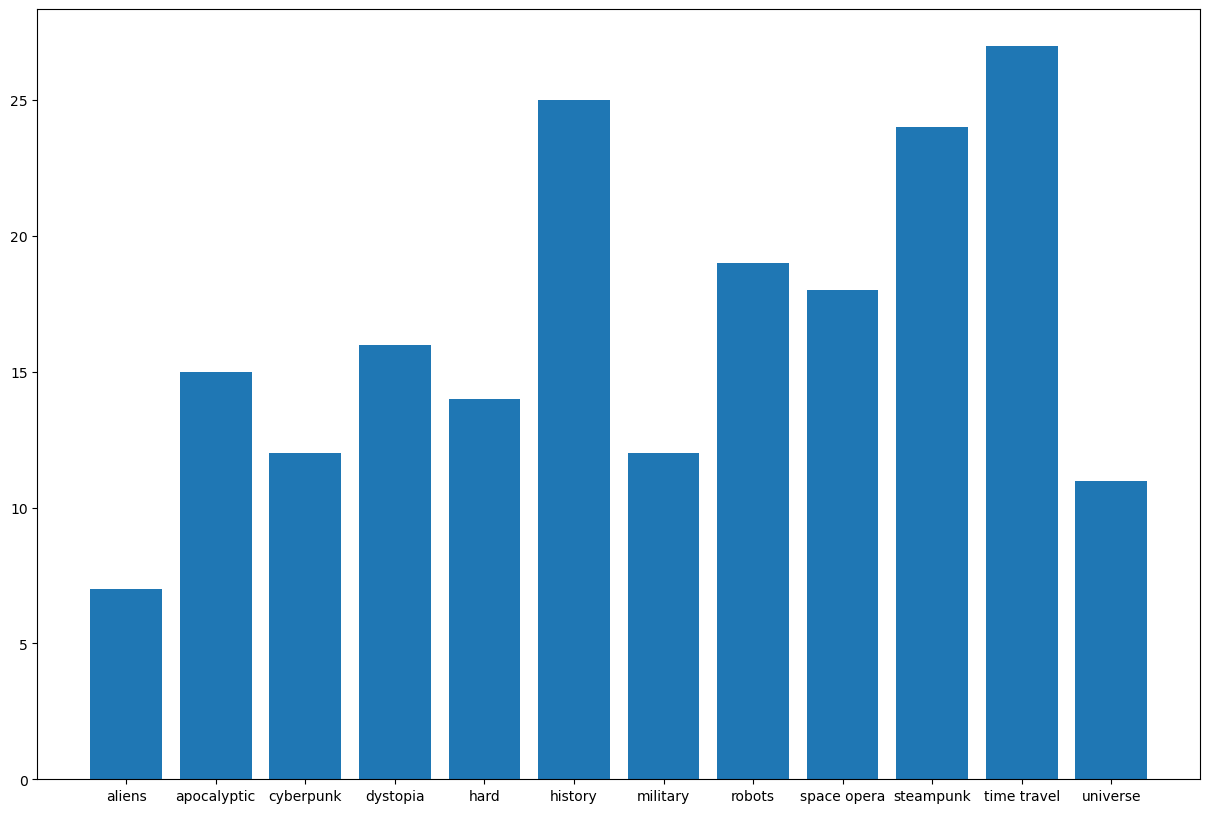

In [41]:
stat = recommend.groupby(['type']).count()
print(stat)

x = stat.index
y = stat.Book_Title

fig = plt.figure()
fig.set_size_inches(15,10)
plt.bar(x,y)